In [1]:
%load_ext disable_autoscroll

<IPython.core.display.Javascript object>

autoscrolling long output is disabled


In [2]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

import csv

In [3]:
file_name = "sos_assessment_reports.tsv"
infile = csv.reader(open(file_name, 'rb'),delimiter = '\t')

headers = None
scores = {}
for i,line in enumerate(infile):
    if i==0:
        headers = line
    else:
        dept = line[0]
        if dept in scores:
            scores[dept].append(line[3:9])
        else:
            scores[dept] = []
            scores[dept].append(line[3:9])

            
print headers
print
depts = scores.keys()

print depts


['Department', 'Contact', 'Outcomes', 'Learning goals (clearly stated?)', 'Progress (Assesments have been conducted and are ongoing)', 'Alignment (Assessments and results narrative are well connected', 'Targets/Criteria (includes precent of population and compentency level)', 'Usefulness (changes were made based on assessment?)', 'Rigor', 'Comments']

['Biology', 'Computational Science', 'Actuarial Science', 'Environmental Studies/Environmental Science', 'Computer Science', 'Chemistry/Biochemistry', 'Mathematics', 'Physics']


In [4]:
for k in scores.keys():
    scores[k] = np.array(scores[k]).astype('float')

In [5]:
scores['Physics']

array([[ 4.,  4.,  4.,  4.,  2.,  4.],
       [ 4.,  4.,  4.,  4.,  0.,  4.],
       [ 4.,  4.,  4.,  4.,  0.,  4.],
       [ 4.,  4.,  2.,  4.,  0.,  2.],
       [ 4.,  4.,  4.,  4.,  4.,  4.],
       [ 4.,  4.,  4.,  4.,  4.,  4.]])

In [6]:
#labels = headers[3:]
labels= ['Goals','Progress','Alignment','Criteria','Usefulness','Rigor']

Biology
Computational Science
Actuarial Science
Environmental Studies/Environmental Science
Computer Science
Chemistry/Biochemistry
Mathematics
Physics


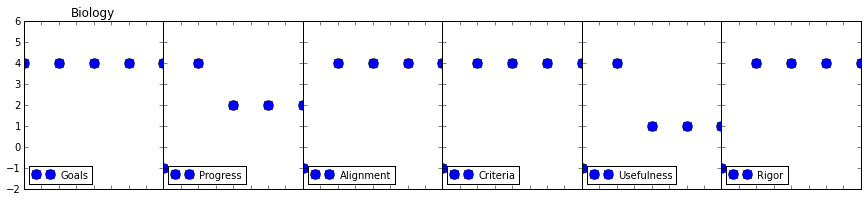

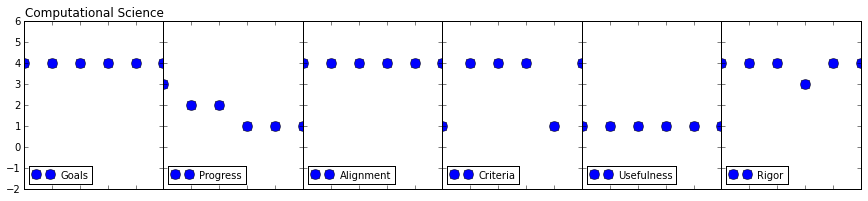

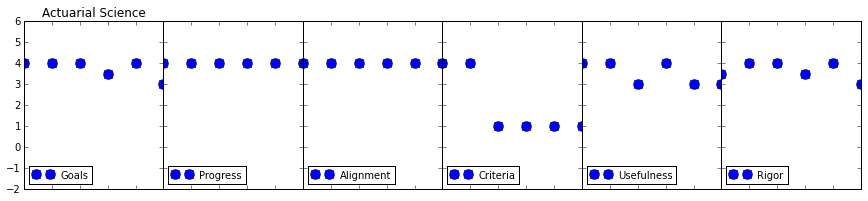

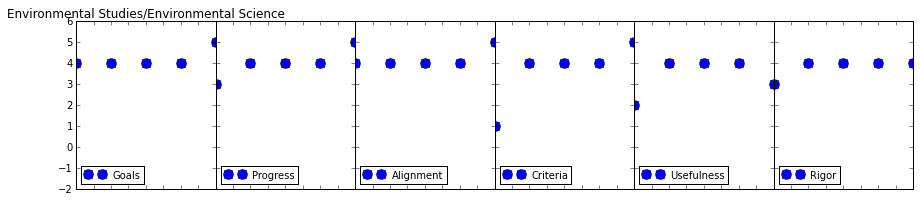

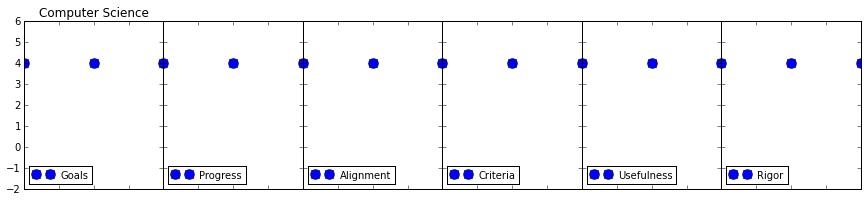

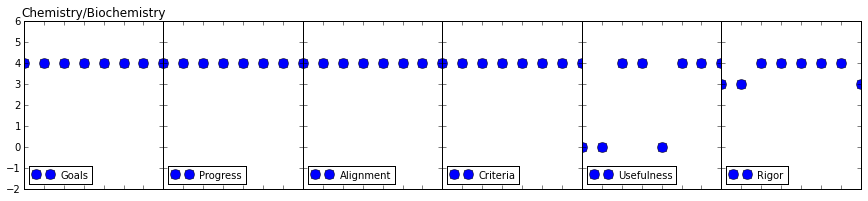

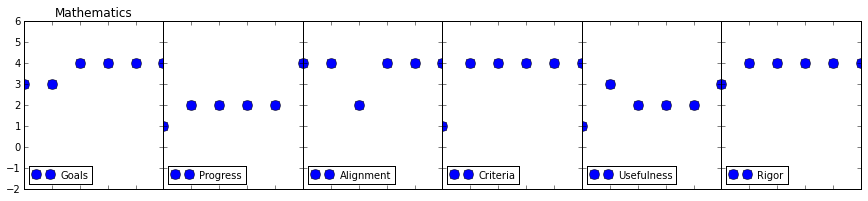

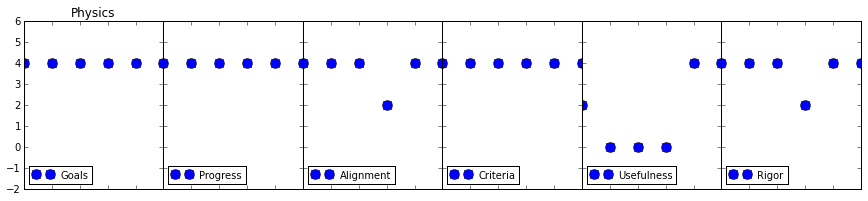

In [7]:
import matplotlib.gridspec as gridspec

gs = []
for j,dept in enumerate(depts):
    v = scores[dept]
    #print v
    plt.figure(figsize=(15,3))
    gs.append(gridspec.GridSpec(1, 6,wspace=0.0, hspace=0.0))
    #gs[j].update(wspace=0.025, hspace=0.05) # set the spacing between axes. 
    print dept

    for i in range(0,6):
        #ax1 = plt.subplot(1,6,i+1)
        ax1 = plt.subplot(gs[j][i])
        #plt.axis('on')
        if i==0:
            plt.title(dept)
        else:
            ax1.set_yticklabels([])
        ax1.set_xticklabels([])
        #ax1.set_aspect('equal')
        plt.plot(v[:,i],'o',label=labels[i],markersize=10)
        plt.ylim(-2,6)
        plt.legend(loc='lower left',fontsize=10)

In [8]:

for k in scores.keys():
    print "%-45s %2.1f" % (k,np.mean(scores[k]))


Biology                                       2.7
Computational Science                         2.9
Actuarial Science                             3.5
Environmental Studies/Environmental Science   3.9
Computer Science                              4.0
Chemistry/Biochemistry                        3.7
Mathematics                                   3.2
Physics                                       3.5
